## This is to estimate how much is someone's medical bill going to be, depending on their BMI, smoking habit, gender, number of children, and age

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
#import the csv file
bill = pd.read_csv('insurance.csv', sep=',')

In [130]:
bill

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [131]:
#1338 rows and 7 columns were presented in the csv file
bill.shape

(1338, 7)

In [132]:
#data type of the columns
bill.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [133]:
#Create numeric values for the smoking habit
condition =[(bill['smoker'] == 'yes'), (bill['smoker'] == 'no')]
values = [1,0]

bill['smoking_habit'] = np.select(condition, values)

In [134]:
#see if there's any null value in the dataset
bill.isnull().values.any()

False

In [135]:
#see if any na value in the dataset
bill.isna().values.any()

False

In [136]:
#see how many male and female patients in this csv file, they are quite balanced
bill.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [137]:
#regions where the patients are from, a bit more from southeast than in northeast
bill.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [138]:
bill.describe()

,age,bmi,children,charges,smoking_habit
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>],
       [<AxesSubplot:title={'center':'smoking_habit'}>, <AxesSubplot:>]],
      dtype=object)

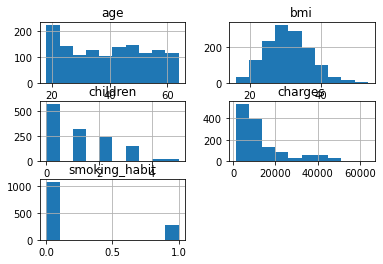

In [139]:
#There are a bit more young adult patients than mid-age and older adults, most of the patients have the bmi around
#30, most patients have less than 2 kids, and most of the charges are less than $20,000, and most people are not
#smokers
bill.hist()

In [140]:
#checking if there's any corrlation among the columns of age, BMI, number of children, medical bill, and their 
#smoking habit
bill.corr()

,age,bmi,children,charges,smoking_habit
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoking_habit,-0.025019,0.003750,0.007673,0.787251,1.000000


In [141]:
#make classifications for these, these classification are from the BMI Calculator
#18.5 or less	Underweight
#18.5 to 24.99	Normal Weight
#25 to 29.99	Overweight
#30 to 34.99	Obesity (Class 1)
#35 to 39.99	Obesity (Class 2)
#40 or greater	Morbid Obesity
condition =[(bill['bmi'] <= 18.5), (bill['bmi'] > 18.5) & (bill['bmi'] <= 24.99),(bill['bmi'] > 24.99) & (bill['bmi'] <= 29.99),
            (bill['bmi'] > 29.99) & (bill['bmi'] <= 34.99), (bill['bmi'] > 34.99) & (bill['bmi'] <= 39.99),(bill['bmi'] > 39.99)]
values = ['Underweight', 'Normal', 'Overweight', 'Class 1 Obese', 'Class 2 Obese', 'Morbid Obesity']

bill['BMI_Classification'] = np.select(condition, values)

In [142]:
bill.head()

,age,sex,bmi,children,smoker,region,charges,smoking_habit,BMI_Classification
0,19,female,27.900,0,yes,southwest,16884.92400,1,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0,Class 1 Obese
2,28,male,33.000,3,no,southeast,4449.46200,0,Class 1 Obese
3,33,male,22.705,0,no,northwest,21984.47061,0,Normal
4,32,male,28.880,0,no,northwest,3866.85520,0,Overweight


age              0.299008
bmi              0.198341
children         0.067998
charges          1.000000
smoking_habit    0.787251
Name: charges, dtype: float64


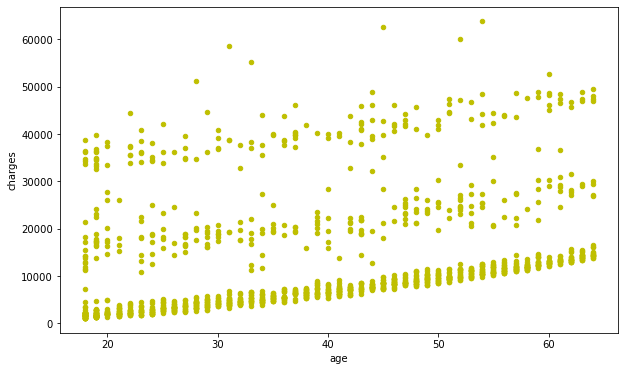

In [143]:
#There's an obvious trend of as age increase, the medical bill is going to increase
bill.plot(kind='scatter', x='age', y='charges', color='y', figsize=(10,6));

print((bill.corr()['charges']))  

In [144]:
#In average, smokers' bills are 3.8 times higher than non smokers
bill.groupby('smoker').mean()

,age,bmi,children,charges,smoking_habit
smoker,,,,,
no,39.385338,30.651795,1.090226,8434.268298,0.0
yes,38.514599,30.708449,1.113139,32050.231832,1.0


In [149]:
#In median, smokers' bills are 4.69 times higher than non smokers
bill.groupby('smoker').median()

,age,bmi,children,charges,smoking_habit
smoker,,,,,
no,40,30.3525,1,7345.40530,0
yes,38,30.4475,1,34456.34845,1


In [145]:
#As BMI level increases, the charages is likely going to increase too
bill.groupby('BMI_Classification').mean().sort_values('bmi')

,age,bmi,children,charges,smoking_habit
BMI_Classification,,,,,
Underweight,32.380952,17.610714,1.047619,8657.620652,0.238095
Normal,36.750000,22.634509,1.129464,10434.531083,0.223214
Overweight,38.922280,27.602591,1.056995,10987.509891,0.191710
Class 1 Obese,39.378517,32.339322,1.148338,14419.674970,0.189258
Class 2 Obese,41.910714,37.169442,1.022321,17054.926699,0.223214
Morbid Obesity,40.630435,43.070000,1.130435,16707.659595,0.228261


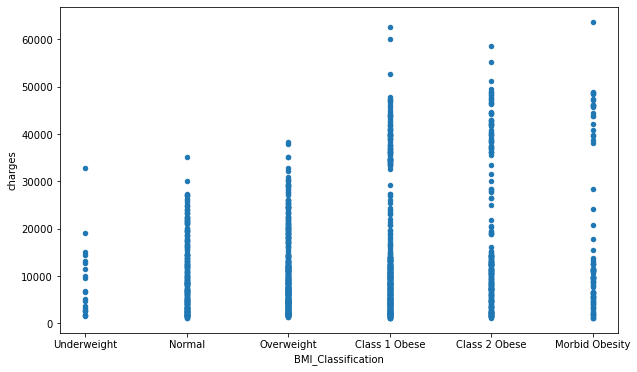

In [146]:
#As BMI increases, the upper limit and the median charge for the medical bill will likely
#to increase especially for class 1 obesesity and beyond
bill.sort_values('bmi', ascending=True, inplace=True)
bill.plot(kind='scatter', x='BMI_Classification', y='charges', figsize=(10, 6));

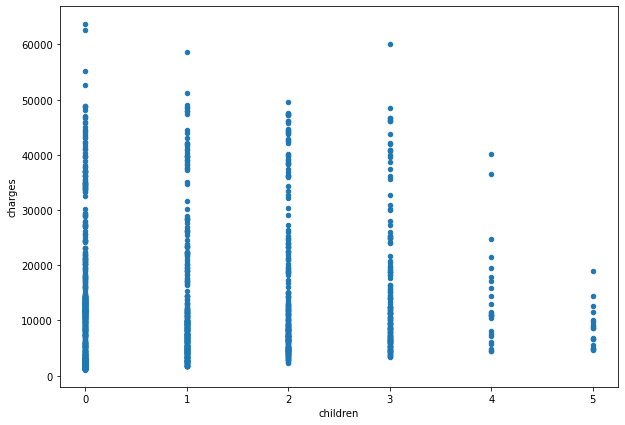

In [147]:
#Most patients have less than 3 children, it seesm like having more children will likely to decrease
#the medical bill amount. Of course corration doesn't mean causation, or having children can change
#someone's diet/living style
bill.plot(kind='scatter', x='children', y='charges', figsize=(10,7));

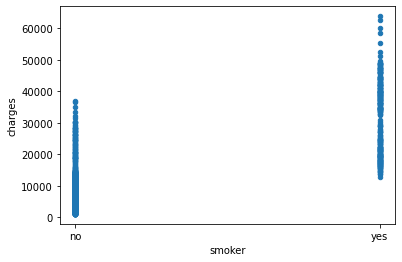

In [148]:
#smokers also has a higher chance to receive a higher medical bill, due to their smoking habit
bill.plot(kind='scatter', x='smoker', y='charges');

